In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt


a=[[1,2,7],[3,4,8],[5,9,6]]
a=np.array(a)
c=np.transpose(a)
b=np.diag(a)
e=np.diag(np.diag(a))
print(b)
print(e)
d=np.trace(e)
print(d)

g=np.power(a,2)
print(g)

[1 4 6]
[[1 0 0]
 [0 4 0]
 [0 0 6]]
11
[[ 1  4 49]
 [ 9 16 64]
 [25 81 36]]


In [3]:
def square(x):
    return np.power(x,2)
square(a)

array([[ 1,  4, 49],
       [ 9, 16, 64],
       [25, 81, 36]], dtype=int32)

In [4]:
def chain_deriv(chain, input_range):
    
    assert len(chain)==2
    f1=Chain[0]

In [5]:
a=13
for i in range(1,a+1):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13


In [6]:
a=np.arange(3).reshape(3,1)
print(a)
a+4

[[0]
 [1]
 [2]]


array([[4],
       [5],
       [6]])

In [7]:
# 2.3.4 코드로 살펴보는 선형회귀linear regression

matrix= [[1,2,7],[3,4,8],[5,9,6]]
matrix=np.array(matrix)
y = [[1],[1],[1]]
y=np.array(y)
w = [[1],[1],[1]]
w=np.array(w)

B = np.random.randint(1,2,(1,1))

weights = {'W':w,'B':B} 

def forward_linear_Regression(X_batch, y_batch, weights):
    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[1] == weights['W'].shape[0]
    assert weights['B'].shape[0] == weights['B'].shape[1]==1
    
    N=np.dot(X_batch,weights['W'])
    f= N+weights['B']
    loss=np.mean(np.power(y_batch-f,2))
    
    #순방향으로 갈때 중간값을 저장해가면서 진행
    forward_info={}
    forward_info['X']= X_batch
    forward_info['N']= N
    forward_info['f']= f
    forward_info['y']= y_batch
    
    return print('loss', loss), print('\n', forward_info)
    

forward_linear_Regression(matrix,y,weights)

print('B:',B)

o=1
for key in weights.keys():
    print(o,key)
    o=o+1

loss 241.66666666666666

 {'X': array([[1, 2, 7],
       [3, 4, 8],
       [5, 9, 6]]), 'N': array([[10],
       [15],
       [20]]), 'f': array([[11],
       [16],
       [21]]), 'y': array([[1],
       [1],
       [1]])}
B: [[1]]
1 W
2 B


In [8]:
# 2.4.3 전체코드로 본 도함수 계산과정

matrix= [[1,2,7],[3,4,8],[5,9,6]]
matrix=np.array(matrix)
y = [[1],[1],[1]]
y=np.array(y)
w = [[1],[1],[1]]
w=np.array(w)
B = np.random.randint(1,2,(1,1))
weights = {'W':w,'B':B} 

loss_grad={}    # dJdW, dJdB 저장공간
forward_info={} # 순방향 저장공간


def loss_gradient(X_batch, y_batch, weights):
    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[1] == weights['W'].shape[0]
    assert weights['B'].shape[0] == weights['B'].shape[1]==1
    
    N=np.dot(X_batch,weights['W'])
    f= N+weights['B']
    loss=np.sum(np.power(y_batch-f,2))
    
    print('N \n',N)
    print('f \n',f)
    print(loss)
    
    #순방향으로 갈때 중간값을 저장해가면서 진행
    forward_info['X']= X_batch
    forward_info['N']= N       # 
    forward_info['f']= f       # 예측값
    forward_info['y']= y_batch # 실제값

    # 2.4.3 전체코드로 본 도함수 계산과정

    batch_size=forward_info['X'].shape[0]
    dJdf=-2*(forward_info['y']-forward_info['f'])
    '''a(N,B)=N+B. N의 어떤 요소를 1단위 증가시키면 f의 값 역시 1단위 증가 따라서  
    dfdN의 모든 요소값이 1인 행렬이 되는 것'''  
    dfdN=np.ones_like(forward_info['N']) 
    dfdB=np.ones_like(forward_info['N'])
    dJdN=dJdf*dfdN 
    '''# ??=>이건 왜 구하는 거임? 48번째줄을 구할때 dot으로 여태까지 계산을 위해서인가...
    
       3X1 과 3X1을 어떻게 곱해지는지 이해가 안됐지만 그 이유가 '*'와 'np.dot'의 차이를 알아야한다.
       어짜피 연쇄법칙으로 쭉 곱해가면서 가야하는데 위의 식을 곱하기 위해선 무조건 행렬이라고
       dot의 개념을 곱하면 안되고 똑같이 곱하되 numpy.array의 성질을 이용(같은 열과 같은 행이면
       위와 같이 곱해됨)한다.
       그래서 위에서는 '*'을 이용했지만 밑에서는 np.dot을 이용한다(즉, 곱해야 하는 행렬의 꼴을 봐가면서 
       '*' 혹은 'np.dot'을 이용하면 된다고 판단. 허나 만약 이도저도 안된다면....이 아니라 만약 그렇다면
       아마 이 계산과정 자체가 나오지 않았을 것) '''
    dNdW=np.transpose(forward_info['X'],(1,0))
    
    
    print('\n dJdf')
    print(dJdf)
    
    print('\n dfdN')
    print(dfdN)
    
    print('\n dNdW')
    print(dNdW)
    
    print('\n dJdN=dJdf*dfdN')
    print(dJdN)
    
    dJdW=np.dot(dNdW, dJdN)
    dLdB=(dJdf*dfdB).sum(axis=0)

    
    loss_grad['W']=dJdW
    loss_grad['B']=dLdB

            
    return 

loss_gradient(matrix,y,weights)

print('==================================================================')

print('batch gradient descent')

def batch(loss_grad):
    for i in range(1,4):
        print('\n')
        print(i,'회 반복')
        for key in weights.keys():
            print('before')
            print(weights[key])
            weights[key] = weights[key]- 0.001 * loss_grad[key]
            print('after')
            print(weights[key])
batch(loss_grad)

N 
 [[10]
 [15]
 [20]]
f 
 [[11]
 [16]
 [21]]
725

 dJdf
[[20]
 [30]
 [40]]

 dfdN
[[1]
 [1]
 [1]]

 dNdW
[[1 3 5]
 [2 4 9]
 [7 8 6]]

 dJdN=dJdf*dfdN
[[20]
 [30]
 [40]]
batch gradient descent


1 회 반복
before
[[1]
 [1]
 [1]]
after
[[0.69]
 [0.48]
 [0.38]]
before
[[1]]
after
[[0.91]]


2 회 반복
before
[[0.69]
 [0.48]
 [0.38]]
after
[[ 0.38]
 [-0.04]
 [-0.24]]
before
[[0.91]]
after
[[0.82]]


3 회 반복
before
[[ 0.38]
 [-0.04]
 [-0.24]]
after
[[ 0.07]
 [-0.56]
 [-0.86]]
before
[[0.82]]
after
[[0.73]]


# 2.4.3 초기버전(절대 지우지 말것)

In [9]:
#2.4.3 초기버전(절대 지우지 말것)
matrix= [[1,2,3],[2,2,3],[3,2,3],[4,2,3],[5,2,3],[6,2,3],[7,2,3],[8,2,3],[9,2,3]]
matrix=np.array(matrix)
y = [[1],[1],[1],[1],[1],[1],[1],[1],[1]]
y=np.array(y)
w = [[1],[1],[1]]
w=np.array(w)
B = np.random.randint(1,2,(1,1))
weights = {'W':w,'B':B} 

loss_grad={}    # dJdW, dJdB 저장공간
forward_info={} # 순방향 저장공간


def loss_gradient(X_batch, y_batch, weights):
    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[1] == weights['W'].shape[0]
    assert weights['B'].shape[0] == weights['B'].shape[1]==1
    
    N=np.dot(X_batch,weights['W'])
    f= N+weights['B']
    loss=np.sum(np.power(y_batch-f,2))
    
    print('N \n',N)
    print('f \n',f)
    print('Loss:',loss)
    
    #순방향으로 갈때 중간값을 저장해가면서 진행
    forward_info['X']= X_batch
    forward_info['N']= N       # 
    forward_info['f']= f       # 예측값
    forward_info['y']= y_batch # 실제값

    # 전체코드로 본 도함수 계산과정

    batch_size=forward_info['X'].shape[0]
    dJdf=-2*(forward_info['y']-forward_info['f'])
    '''a(N,B)=N+B. N의 어떤 요소를 1단위 증가시키면 f의 값 역시 1단위 증가 따라서  
    dfdN의 모든 요소값이 1인 행렬이 되는 것'''  
    dfdN=np.ones_like(forward_info['N']) 
    dfdB=np.ones_like(forward_info['N'])
    dJdN=dJdf*dfdN 
    '''# ??=>이건 왜 구하는 거임? 48번째줄을 구할때 dot으로 여태까지 계산을 위해서인가...
    
       3X1 과 3X1을 어떻게 곱해지는지 이해가 안됐지만 그 이유가 '*'와 'np.dot'의 차이를 알아야한다.
       어짜피 연쇄법칙으로 쭉 곱해가면서 가야하는데 위의 식을 곱하기 위해선 무조건 행렬이라고
       dot의 개념을 곱하면 안되고 똑같이 곱하되 numpy.array의 성질을 이용(같은 열과 같은 행이면
       위와 같이 곱해됨)한다.
       그래서 위에서는 '*'을 이용했지만 밑에서는 np.dot을 이용한다(즉, 곱해야 하는 행렬의 꼴을 봐가면서 
       '*' 혹은 'np.dot'을 이용하면 된다고 판단. 허나 만약 이도저도 안된다면....이 아니라 만약 그렇다면
       아마 이 계산과정 자체가 나오지 않았을 것) '''
    dNdW=np.transpose(forward_info['X'],(1,0))
    
    
    dJdW=np.dot(dNdW, dJdN)
    dLdB=(dJdf*dfdB).sum(axis=0)

    
    loss_grad['W']=dJdW
    loss_grad['B']=dLdB

            
    return print(loss_grad)

#loss_gradient(matrix,y,weights)

print('==================================================================')

print('batch gradient descent')
def batch(loss_grad):
    for i in range(1,4):
        print('\n')
        print(i,'회 반복')
        for key in weights.keys():
            print('before')
            print(weights[key])
            weights[key] = weights[key]- 0.001 * loss_grad[key]
            print('after')
            print(weights[key])
#batch(loss_grad)

minibatch_size = 3
number_minibatch= np.int(np.ceil(matrix.shape[0]/minibatch_size))
epoch_size=4

for j in range(1,epoch_size+1):
    print('*******',j,'번차 epoch*******')
    for i in range(1, number_minibatch+1):
        print('\n',minibatch_size*i-(minibatch_size-1)-1,'~',minibatch_size*i-1,'열')
        matrix1=matrix[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
        y1=y[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
        loss_gradient(matrix1,y1,weights)

        for key in weights.keys():
            print(key)
            print('before')
            print(weights[key])
            weights[key]=weights[key]- 0.0001 * loss_grad[key]
            print('after')
            print(weights[key])
            print('\n')


batch gradient descent
******* 1 번차 epoch*******

 0 ~ 2 열
N 
 [[6]
 [7]
 [8]]
f 
 [[7]
 [8]
 [9]]
Loss: 149
{'W': array([[ 88],
       [ 84],
       [126]]), 'B': array([42])}
W
before
[[1]
 [1]
 [1]]
after
[[0.9912]
 [0.9916]
 [0.9874]]


B
before
[[1]]
after
[[0.9958]]



 3 ~ 5 열
N 
 [[ 8.9102]
 [ 9.9014]
 [10.8926]]
f 
 [[ 9.906 ]
 [10.8972]
 [11.8884]]
Loss: 295.8286584
{'W': array([[300.8808],
       [118.7664],
       [178.1496]]), 'B': array([59.3832])}
W
before
[[0.9912]
 [0.9916]
 [0.9874]]
after
[[0.96111192]
 [0.97972336]
 [0.96958504]]


B
before
[[0.9958]]
after
[[0.98986168]]



 6 ~ 8 열
N 
 [[11.59598528]
 [12.5570972 ]
 [13.51820912]]
f 
 [[12.58584696]
 [13.54695888]
 [14.5080708 ]]
Loss: 474.1260036547649
{'W': array([[606.09847392],
       [150.56350656],
       [225.84525984]]), 'B': array([75.28175328])}
W
before
[[0.96111192]
 [0.97972336]
 [0.96958504]]
after
[[0.90050207]
 [0.96466701]
 [0.94700051]]


B
before
[[0.98986168]]
after
[[0.9823335]]


******* 2 번차

[-2.10241523  9.68028903  7.72958862  3.74758091  1.1918811  -2.42086939
  5.46478285  3.55489455  5.23766107  3.18929798]


(array([2., 0., 1., 0., 2., 1., 2., 0., 1., 1.]),
 array([-2.42086939e+00, -1.21075354e+00, -6.37702934e-04,  1.20947814e+00,
         2.41959398e+00,  3.62970982e+00,  4.83982566e+00,  6.04994150e+00,
         7.26005734e+00,  8.47017319e+00,  9.68028903e+00]),
 <a list of 10 Patch objects>)

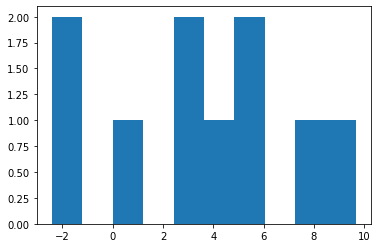

In [10]:
b=np.random.uniform(-10,10,size=10)
print(b)
plt.hist(b,bins=10)

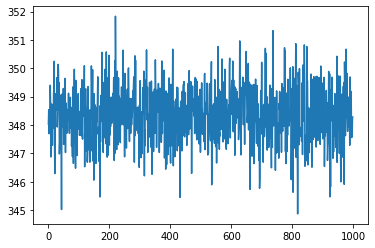

In [13]:
W= np.random.uniform(-10,10,size=1000)
b= np.random.uniform(-10,10,size=1000)
x= np.random.uniform(-10,10,size=1000)

W=np.reshape(W,(1000,1))
b=np.reshape(b,(1000,1))
x=np.reshape(x,(1000,1))

mu=np.dot(np.transpose(W),x)+b
sigma=0.1*10

y=np.random.normal(mu,sigma,size=1000)

plt.plot(y)
plt.show()


In [18]:
xlis = []
ylis = []
flis = [] 
wlis = []

'''
plt.scatter(xlis,flis)
plt.scatter(xlis,ylis)
plt.xlabel('x')
plt.ylabel('y')
'''
#print(result[:,0])

def linear_regression(minibatch_size, epoch_size):
    R=10
    size=1
    weights={}
    #data_set={}    
    loss_grad={}    # dJdW, dJdB 저장공간
    forward_info={} # 순방향 저장공간
    batch={}
    
    W= np.random.uniform(-R,R,size=size)
    b= np.random.uniform(-R,R,size=size)
    b= random.choice(b)

    for i in range(10):
        x = np.random.uniform(-R,R,size=size)
        y = np.random.normal(W*x+b,1,size=size)
        xlis.append(x)
        ylis.append(y)
        flis.append(W*x+b)
        
    x=np.array(xlis)
    y=np.array(ylis)
    
    weights['W']=W
    weights['B']=b

    result=np.concatenate((x,y),axis=1)
       
    train_idx=int(result.shape[0]*0.85)
    dev_idx=int(result.shape[0]*0.05)
    test_idx=int(result.shape[0]*0.1)
    
    train_data_set=result[0:train_idx,:]
    test_data_set=result[train_idx:train_idx+test_idx,:]
    dev_data_set=result[train_idx+test_idx:train_idx+test_idx+dev_idx,:]
    
    for j in range(1,epoch_size+1):
        print('*******',j,'번차 epoch*******')
        result=np.random.permutation(result)
        
        X_batch= train_data_set[:,0]
        y_batch= train_data_set[:,1]
        X_batch=np.reshape(X_batch,(train_idx,size))
        y_batch=np.reshape(y_batch,(train_idx,size))

        number_minibatch= np.int(np.ceil(X_batch.shape[0]/minibatch_size))
    
    #    assert X_batch.shape[0] == y_batch.shape[0]
    #    assert X_batch.shape[1] == weights['W'].shape[0]
        print('result')
        print(result)
        
        print(weights)
        
        for i in range(1, number_minibatch+1):
            
           
            print('\n',minibatch_size*i-(minibatch_size-1)-1,'~',minibatch_size*i-1,'열')
            X_batch1=X_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            y1=y_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            
            print(X_batch1)
            print(y1)
            
            N=weights['W']*X_batch1
            f= N+weights['B']
            loss=np.mean(np.power(y1-f,2))
            
            forward_info['X']= X_batch1
            forward_info['N']= N       # 
            forward_info['f']= f       # 예측값
            forward_info['y']= y1 # 실제값

            # 전체코드로 본 도함수 계산과정
            batch_size=forward_info['X'].shape[0]
            dJdf=-2*(forward_info['y']-forward_info['f'])
            dfdN=np.ones_like(forward_info['N']) 
            dfdB=np.ones_like(forward_info['N'])
            dJdN=dJdf*dfdN 
            dNdW=np.transpose(forward_info['X'],(1,0))

            dJdW=np.dot(dNdW, dJdN)
            dLdB=(dJdf*dfdB).sum(axis=0)

            loss_grad['W']=dJdW
            loss_grad['B']=dLdB
            print('before')
            print(weights)

            for key in weights.keys():
                weights[key]=weights[key]- 0.01 * loss_grad[key]

            print('after')
            print(weights)
    
        N=weights['W']*X_batch1
        f= N+weights['B']
        loss=np.mean(np.power(y1-f,2))
        print('Loss',loss)
        print('=================================')
linear_regression(3,3)

******* 1 번차 epoch*******
result
[[ -8.24755302  42.5748461 ]
 [  0.53029429   2.19422096]
 [ -2.13874718  14.25798247]
 [  4.64061585 -16.09029894]
 [  4.27514945 -13.21119801]
 [  8.14812538 -32.24893528]
 [  8.36420131 -32.94629813]
 [ -0.31585884   7.68652955]
 [  5.77857804 -21.62842356]
 [  0.36894634   4.64983269]]
{'W': array([-4.58844226]), 'B': 5.283435420559947}

 0 ~ 2 열
[[ 8.14812538]
 [ 8.36420131]
 [-8.24755302]]
[[-32.24893528]
 [-32.94629813]
 [ 42.5748461 ]]
before
{'W': array([-4.58844226]), 'B': 5.283435420559947}
after
{'W': array([[-4.49613238]]), 'B': array([5.27247028])}

 3 ~ 5 열
[[-2.13874718]
 [-0.31585884]
 [ 0.36894634]]
[[14.25798247]
 [ 7.68652955]
 [ 4.64983269]]
before
{'W': array([[-4.49613238]]), 'B': array([5.27247028])}
after
{'W': array([[-4.46779218]]), 'B': array([5.30046092])}

 6 ~ 8 열
[[4.27514945]
 [5.77857804]]
[[-13.21119801]
 [-21.62842356]]
before
{'W': array([[-4.46779218]]), 'B': array([5.30046092])}
after
{'W': array([[-4.54589236]]), 

In [15]:
xlis = []
ylis = []
flis = [] 
wlis = []

'''
plt.scatter(xlis,flis)
plt.scatter(xlis,ylis)
plt.xlabel('x')
plt.ylabel('y')
'''
#print(result[:,0])

def linear_regression(minibatch_size, epoch_size):
    R=10
    size=1
    weights={}
    #data_set={}    
    loss_grad={}    # dJdW, dJdB 저장공간
    forward_info={} # 순방향 저장공간
    batch={}
    
    W= np.random.uniform(-R,R,size=size)
    b= np.random.uniform(-R,R,size=size)
    b= random.choice(b)

    for i in range(1000):
        x = np.random.uniform(-R,R,size=size)
        y = np.random.normal(W*x+b,1,size=size)
        xlis.append(x)
        ylis.append(y)
        flis.append(W*x+b)
        
    x=np.array(xlis)
    y=np.array(ylis)
    
    weights['W']=W
    weights['B']=b

    result=np.concatenate((x,y),axis=1)
       
    train_idx=int(result.shape[0]*0.85)
    dev_idx=int(result.shape[0]*0.05)
    test_idx=int(result.shape[0]*0.1)
    
    train_data_set=result[0:train_idx,:]
    test_data_set=result[train_idx:train_idx+test_idx,:]
    dev_data_set=result[train_idx+test_idx:train_idx+test_idx+dev_idx,:]

    
    for j in range(1,epoch_size+1):
        print('*************',j,'번차 epoch *************')
        result=np.random.permutation(result)
   
        X_batch= train_data_set[:,0]
        y_batch= train_data_set[:,1]
        X_batch=np.reshape(X_batch,(train_idx,size))
        y_batch=np.reshape(y_batch,(train_idx,size))

        number_minibatch= np.int(np.ceil(X_batch.shape[0]/minibatch_size))
    
    #    assert X_batch.shape[0] == y_batch.shape[0]
    #    assert X_batch.shape[1] == weights['W'].shape[0]
        
        for i in range(1, number_minibatch+1):
            #print('\n',minibatch_size*i-(minibatch_size-1)-1,'~',minibatch_size*i-1,'열')
            
            
            #80~104까지 하나의 함수로 만들면 될거같은데. 그러면 train,test,dev의 mse를 구할 수 있을거 같다.
            #함수(데이터,number_minibatch+1)
            X_batch1=X_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            y1=y_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            
            N=weights['W']*X_batch1
            f= N+weights['B']
            loss=np.mean(np.power(y1-f,2))
            
            forward_info['X']= X_batch1
            forward_info['N']= N       # 
            forward_info['f']= f       # 예측값
            forward_info['y']= y1 # 실제값

            # 전체코드로 본 도함수 계산과정
            batch_size=forward_info['X'].shape[0]
            dJdf=-2*(forward_info['y']-forward_info['f'])
            dfdN=np.ones_like(forward_info['N']) 
            dfdB=np.ones_like(forward_info['N'])
            dJdN=dJdf*dfdN 
            dNdW=np.transpose(forward_info['X'],(1,0))

            dJdW=np.dot(dNdW, dJdN)
            dLdB=(dJdf*dfdB).sum(axis=0)

            loss_grad['W']=dJdW
            loss_grad['B']=dLdB

            for key in weights.keys():
                weights[key]=weights[key]- 0.01 * loss_grad[key]
        
        N=weights['W']*X_batch1
        f= N+weights['B']
        loss=np.mean(np.power(y1-f,2))
        print('Loss',loss)
        print('=================================')
linear_regression(90,5)
    

************* 1 번차 epoch *************
Loss 5.4445406568145575e+32
************* 2 번차 epoch *************
Loss 2.2151292849141153e+67
************* 3 번차 epoch *************
Loss 9.012326398449458e+101
************* 4 번차 epoch *************
Loss 3.6666946559436707e+136
************* 5 번차 epoch *************
Loss 1.4918067883381319e+171


Train_data
************* 1 번차 epoch *************
Loss 1.0251186028544
************* 2 번차 epoch *************
Loss 1.0247450994273
************* 3 번차 epoch *************
Loss 1.0244845077011
************* 4 번차 epoch *************
Loss 1.0244003296697
************* 5 번차 epoch *************
Loss 1.0243966728465
************* 6 번차 epoch *************
Loss 1.0243611402880
************* 7 번차 epoch *************
Loss 1.0243444063185
************* 8 번차 epoch *************
Loss 1.0243400045635
************* 9 번차 epoch *************
Loss 1.0243306641645
************* 10 번차 epoch *************
Loss 1.0243219284221
************* 11 번차 epoch *************
Loss 1.0243315756471
************* 12 번차 epoch *************
Loss 1.0243084729215
************* 13 번차 epoch *************
Loss 1.0243047063338
************* 14 번차 epoch *************
Loss 1.0243016912768
************* 15 번차 epoch *************
Loss 1.0242998467909
************* 16 번차 epoch *************
Loss 1.0242901621544
************* 17 번차 ep

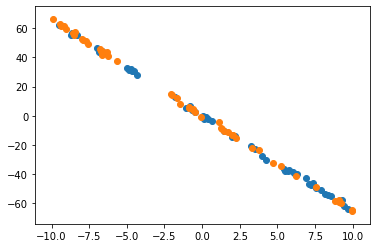

In [70]:
#유력
np.set_printoptions(precision=7)
xlis = []
ylis = []
flis = [] 
wlis = []

R=10
size=1
weights={}
#data_set={}    
loss_grad={}    # dJdW, dJdB 저장공간
forward_info={} # 순방향 저장공간
batch={}

W= np.random.uniform(-R,R,size=size)
b= np.random.uniform(-R,R,size=size)
b= random.choice(b)

for i in range(1000):
    x = np.random.uniform(-R,R,size=size)
    y = np.random.normal(W*x+b,1,size=size)
    xlis.append(x)
    ylis.append(y)
    flis.append(W*x+b)

x=np.array(xlis)
y=np.array(ylis)

weights['W']=W
weights['B']=b

result=np.concatenate((x,y),axis=1)

train_idx=int(result.shape[0]*0.85)
dev_idx=int(result.shape[0]*0.05)
test_idx=int(result.shape[0]*0.1)

train_data_set=result[0:train_idx,:]
test_data_set=result[train_idx:train_idx+test_idx,:]
dev_data_set=result[train_idx+test_idx:train_idx+test_idx+dev_idx,:]

def linear_regression(data, idx, minibatch_size, epoch_size):
    data_list=[]
    X_batch= data[:,0]
    y_batch= data[:,1]
    X_batch=np.reshape(X_batch,(idx,size))
    y_batch=np.reshape(y_batch,(idx,size))

    number_minibatch= np.int(np.ceil(X_batch.shape[0]/minibatch_size))
    
    
    for j in range(1,epoch_size+1):
        print('*************',j,'번차 epoch *************')
        data=np.random.permutation(data)
        X_batch= data[:,0]
        y_batch= data[:,1]
        X_batch=np.reshape(X_batch,(idx,size))
        y_batch=np.reshape(y_batch,(idx,size))
        
        number_minibatch= np.int(np.ceil(X_batch.shape[0]/minibatch_size))
    
    #    assert X_batch.shape[0] == y_batch.shape[0]
    #    assert X_batch.shape[1] == weights['W'].shape[0]
        
        for i in range(1, number_minibatch+1):
            X_batch_temp=X_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            y_temp=y_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            
            N=weights['W']*X_batch_temp
            f= N+weights['B']
            loss=np.mean(np.power(y_temp-f,2))
            
            forward_info['X']= X_batch_temp
            forward_info['N']= N       # 
            forward_info['f']= f       # 예측값
            forward_info['y']= y_temp # 실제값

            # 전체코드로 본 도함수 계산과정
            batch_size=forward_info['X'].shape[0]
            dJdf=-2*(forward_info['y']-forward_info['f'])
            dfdN=np.ones_like(forward_info['N']) 
            dfdB=np.ones_like(forward_info['N'])
            dJdN=dJdf*dfdN 
            dNdW=np.transpose(forward_info['X'],(1,0))

            dJdW=np.dot(dNdW, dJdN)
            dLdB=(dJdf*dfdB).sum(axis=0)

            loss_grad['W']=dJdW
            loss_grad['B']=dLdB

            for key in weights.keys():
                weights[key]=weights[key]- 0.00001 * loss_grad[key]
        
        N=weights['W']*X_batch
        f= N+weights['B']
        loss=np.mean(np.power(y_batch-f,2))
        print('Loss',loss)
      
        #print('=================================')
        
        data_list.append(loss)
        
    X_batch = list(X_batch)
    
    #epoch에 따른 loss 출력도 가능
    return plt.scatter(X_batch_temp, y_temp, label = 'name')

print('Train_data')
train_ = linear_regression(train_data_set,train_idx,50,30)

#print('\ndev_data')
#dev_ = linear_regression(dev_data_set,dev_idx,20,30)

print('\nTest_data')
Test_ = linear_regression(test_data_set,test_idx,50,30)


In [17]:
for x in range(length):
    print('-------------',l[x],'번째 backpropagation-------------')
    for y in range(x):
        if (y == 0):
            dJd_ = dJda
        else :
            '''print('dJd_')
            print(dJd_)
            
            print('affine')
            print(affine[y-1])
            
            dJd_ = Relu.backward(affine[y-1])
            
            print('dJd_NEXT')
            print(dJd_)
            
            dJd_ = np.dot(np.transpose(param_w[y-1]),dJd_)'''
            
            print('np.transpose(param_w)')
            print(np.transpose(param_w[y-1]))
            dJd_ = np.dot(np.transpose(param_w[y-1]),dJd_)
            print('dJd_')
            print(dJd_)
            dJd_ = Relu.backward(affine[y-1])
            print('dJd_')
            print(dJd_)
            
    dJdw = np.dot(dJd_,np.transpose(affine[y]))
    dJdb = dJd_,*np.ones_like(affine[y])
        
        
    grad_w.append(dJdw)
    grad_b.append(dJdb)
    #grad_affine.append()

NameError: name 'length' is not defined